In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

import sys, os
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.time_series_models import sarima_forecast


In [4]:
df = pd.read_csv("../data/simulated/line_data.csv")
df.head()


,time,step,hour,shift_id,normal_queue,priority_queue,wip_total,completed_jobs,defect_rate,defects,...,machine_A_speed,machine_B_speed,machine_C_speed,maintenance_A,maintenance_B,maintenance_C,demand_spike_flag,queue_length,lead_time,machine_status
0,0.0,0,0,3,7.0,0.0,7.0,5,0.082489,0,...,2.319144,1.780925,1.178936,0,0,0,0,7.0,1.4,1.0
1,1.0,1,0,3,3.0,0.0,3.0,5,0.082611,0,...,2.166149,1.562310,0.929916,0,0,0,0,3.0,0.6,1.0
2,2.0,2,0,3,0.0,0.0,0.0,3,0.082709,0,...,1.997636,1.812255,1.099372,0,0,0,0,0.0,0.0,1.0
3,3.0,3,0,3,0.0,0.0,0.0,2,0.082782,0,...,2.066750,1.783581,1.280313,0,0,0,0,0.0,0.0,1.0
4,4.0,4,0,3,0.0,0.0,0.0,1,0.082828,0,...,1.892805,1.543757,1.344203,0,0,0,0,0.0,0.0,1.0


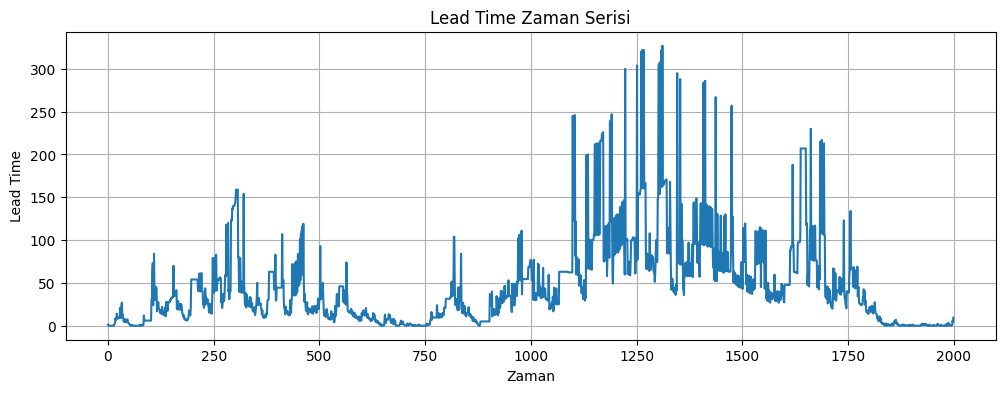

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df["lead_time"])
plt.title("Lead Time Zaman Serisi")
plt.xlabel("Zaman")
plt.ylabel("Lead Time")
plt.grid()
plt.show()


In [6]:
sarima_preds, sarima_mape, sarima_rmse = sarima_forecast(df)

sarima_mape, sarima_rmse


(537114357814696.56, np.float64(36.36423535066042))

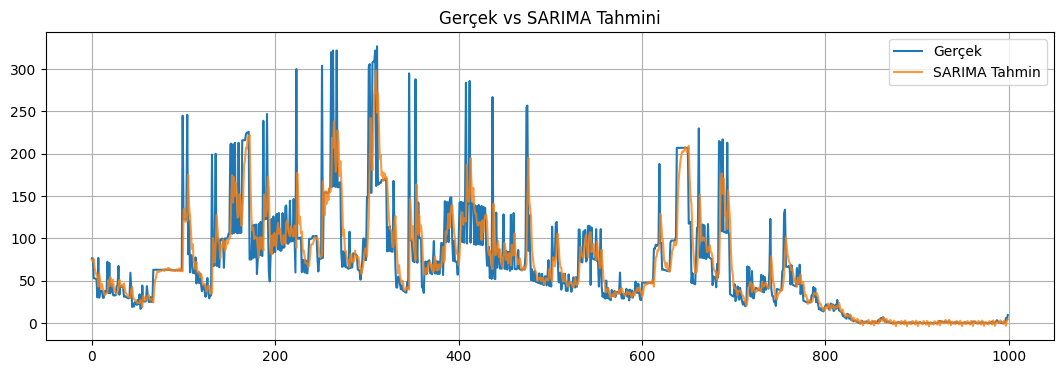

In [7]:
start = len(df)//2
true_values = df["lead_time"].iloc[start:]

plt.figure(figsize=(13,4))
plt.plot(true_values.values, label="Gerçek")
plt.plot(sarima_preds.values, label="SARIMA Tahmin", alpha=0.8)
plt.title("Gerçek vs SARIMA Tahmini")
plt.legend()
plt.grid()
plt.show()


In [3]:
import sys
print(sys.executable)


c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Scripts\python.exe


In [6]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.data_simulation import simulate_production_line_advanced

df = simulate_production_line_advanced(T=2000, dt=1)
df.head()


WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\notebooks\..\src\data_simulation.py:296: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["lead_time"] = (df["wip_total"] / safe_completed).fillna(method="ffill").fillna(



,time,step,hour,shift_id,normal_queue,priority_queue,wip_total,completed_jobs,defect_rate,defects,...,machine_A_speed,machine_B_speed,machine_C_speed,maintenance_A,maintenance_B,maintenance_C,demand_spike_flag,queue_length,lead_time,machine_status
0,0,0,0,3,7.0,0.0,7.0,5,0.082489,0,...,2.319144,1.780925,1.178936,0,0,0,0,7.0,1.4,1.0
1,1,1,0,3,3.0,0.0,3.0,5,0.082611,0,...,2.166149,1.562310,0.929916,0,0,0,0,3.0,0.6,1.0
2,2,2,0,3,0.0,0.0,0.0,3,0.082709,0,...,1.997636,1.812255,1.099372,0,0,0,0,0.0,0.0,1.0
3,3,3,0,3,0.0,0.0,0.0,2,0.082782,0,...,2.066750,1.783581,1.280313,0,0,0,0,0.0,0.0,1.0
4,4,4,0,3,0.0,0.0,0.0,1,0.082828,0,...,1.892805,1.543757,1.344203,0,0,0,0,0.0,0.0,1.0


In [6]:
import pandas as pd
import numpy as np

# 10.000 satırlık örnek zaman serisi
N = 10000
time = np.arange(1, N + 1)

# lead_time rastgele ama trend içeren örnek veri
lead_time = 30 + 5*np.sin(time/200) + np.random.normal(0, 2, N)

df = pd.DataFrame({
    "time": time,
    "lead_time": lead_time
})

print(df.head(), df.tail())


   time  lead_time
0     1  30.943879
1     2  32.470449
2     3  29.915397
3     4  31.945580
4     5  32.481915        time  lead_time
9995   9996  24.712176
9996   9997  28.937899
9997   9998  25.913225
9998   9999  31.375405
9999  10000  29.442080


In [11]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# -------------------------------
# 1) Veri Hazırlama
# -------------------------------
df_NeuralProphet = df.copy()
df_NeuralProphet["ds"] = pd.to_datetime(df_NeuralProphet["time"], unit="s")
df_NeuralProphet["y"] = df_NeuralProphet["lead_time"].astype(float)
df_NeuralProphet = df_NeuralProphet[["ds", "y"]]

# -------------------------------
# 2) Model
# -------------------------------
model = NeuralProphet(
    n_lags=48,
    n_forecasts=1,
    seasonality_mode="multiplicative",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    learning_rate=0.005
)

# -------------------------------
# 3) Fit
# -------------------------------
model.fit(df_NeuralProphet, freq="1min")

# -------------------------------
# 4) Tahmin
# -------------------------------
forecast = model.predict(df_NeuralProphet)

# -------------------------------
# 5) Tahmin & gerçek değer hizalama (NaN temizleyerek)
# -------------------------------
aligned = pd.DataFrame({
    "true": df["lead_time"],
    "pred": forecast["yhat1"]
}).dropna().reset_index(drop=True)

y_true = aligned["true"]
y_pred = aligned["pred"]

print("Final lengths:", len(y_true), len(y_pred))

# -------------------------------
# 6) Metrikler
# -------------------------------
neural_mape = mean_absolute_percentage_error(y_true, y_pred)
neural_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("NEURALPROPHET MAPE:", neural_mape)
print("NEURALPROPHET RMSE:", neural_rmse)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INF

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency s corresponds to 99.99% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` a

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Final lengths: 9952 9952
NEURALPROPHET MAPE: 0.05569853095345639
NEURALPROPHET RMSE: 2.0505582671249623


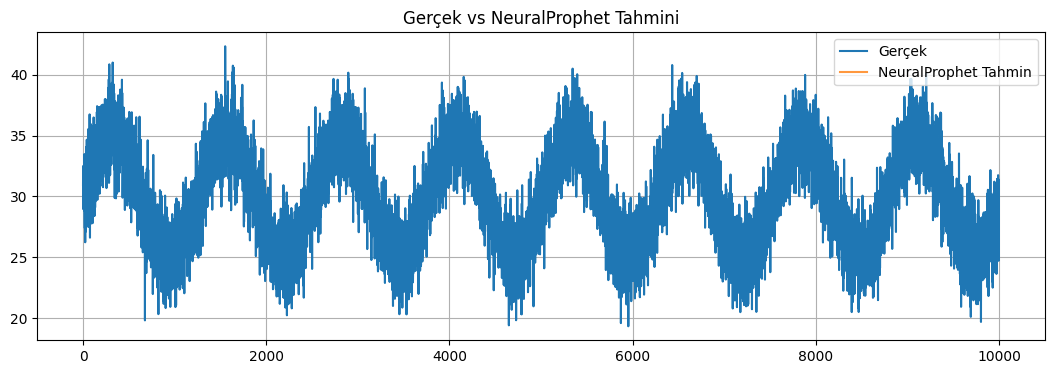

In [13]:
plt.figure(figsize=(13,4))
plt.plot(true_values, label="Gerçek")
plt.plot(pred_series.values, label="NeuralProphet Tahmin", alpha=0.8)
plt.title("Gerçek vs NeuralProphet Tahmini")
plt.legend()
plt.grid()
plt.show()

In [15]:
import sys
import os

# src klasörünü bul ve path'e ekle
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")

if src_path not in sys.path:
    sys.path.append(src_path)

print("SRC YOLU EKLENDİ:", src_path)


SRC YOLU EKLENDİ: c:\Users\Casper\Desktop\RLveZS\src


In [19]:
from time_series_models import sarima_forecast
sarima_pred, sarima_mape, sarima_rmse = sarima_forecast(df)


print("SARIMA MAPE :", sarima_mape)
print("SARIMA RMSE :", sarima_rmse)


WARNING - (py.warnings._showwarnmsg) - c:\Users\Casper\Desktop\RLveZS\rlvezs_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMA MAPE : 0.05560832275063037
SARIMA RMSE : 2.0411050061012985


In [24]:
import numpy as np

def prepare_sequences(series, window=10):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)


In [25]:
performance_df = pd.DataFrame({
    "Model": ["SARIMA", "NeuralProphet"],
    "MAPE": [sarima_mape, neural_mape],
    "RMSE": [sarima_rmse, neural_rmse]
})

performance_df


,Model,MAPE,RMSE
0,SARIMA,0.055608,2.041105
1,NeuralProphet,0.055699,2.050558


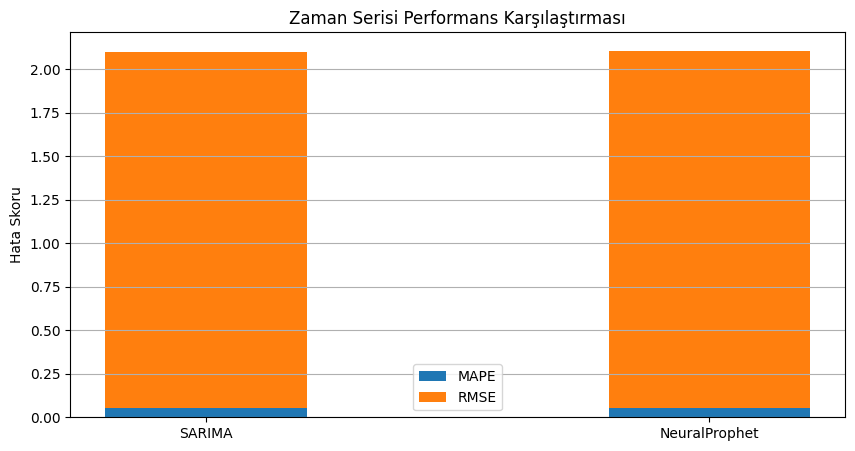

In [26]:
plt.figure(figsize=(10,5))

bar_width = 0.4
models = performance_df["Model"]

plt.bar(models, performance_df["MAPE"], width=0.4, label="MAPE")
plt.bar(models, performance_df["RMSE"], width=0.4, bottom=performance_df["MAPE"], label="RMSE")

plt.title("Zaman Serisi Performans Karşılaştırması")
plt.ylabel("Hata Skoru")
plt.legend()
plt.grid(axis='y')
plt.show()
